## Decision Tree classification


Dataset link :  https://www.kaggle.com/zhaoyingzhu/heartcsv?select=Heart.csv
        
### About the Data set
     This dataset gives the information realated to heart disease. 
     Dataset contain 13 columns, target is the class variable which is affected by other 12 columns.
     Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm 
    and findout which algorithm suitable for this dataset.

### Attribute Information

     Age (age in years)
     Sex (1 = male; 0 = female)
     CP (chest pain type)
     TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
     CHOL (serum cholestoral in mg/dl)
     FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     RESTECH (resting electrocardiographic results)
     THALACH (maximum heart rate achieved)
     EXANG (exercise induced angina (1 = yes; 0 = no))
     OLDPEAK (ST depression induced by exercise relative to rest)
     SLOPE (the slope of the peak exercise ST segment)
     CA (number of major vessels (0-3) colored by flourosopy)
     THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
     TARGET (1 or 0)

Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

6) Conclusion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\Priyanaka\Dataset\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
from collections import Counter
import pandas_profiling as pp

In [6]:
pp.ProfileReport(df)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### There is no missing value 

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(303, 14)

In [10]:
df.size

4242

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [13]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
## we remove duplicates values

In [100]:
sns.countplot(x = 'target' , data = df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='target', ylabel='count'>

In [17]:
## our dataset is in balanced

In [101]:
sns.countplot(x= 'sex' ,hue = 'target', data = df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='sex', ylabel='count'>

In [19]:
# check outlier

In [20]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(7,2,1)
fig = df.boxplot(column = 'age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(7, 2, 2)
fig = df.boxplot(column= 'sex')
fig.set_title('')
fig.set_ylabel('sex')

plt.subplot(7,2,3)
fig = df.boxplot(column = 'cp')
fig.set_title('')
fig.set_ylabel('cp')

plt.subplot(7, 2, 4)
fig = df.boxplot(column = 'trestbps')
fig.set_title('')
fig.set_ylabel('trestbps')


plt.subplot(7, 2, 5)
fig = df.boxplot(column= 'chol')
fig.set_title('')
fig.set_ylabel('chol')

plt.subplot(7, 2, 6)
fig = df.boxplot(column= 'fbs')
fig.set_title('')
fig.set_ylabel('fbs')


plt.subplot(7, 2, 7)
fig = df.boxplot(column='restecg')
fig.set_title('')
fig.set_ylabel('restecg')

plt.subplot(7, 2, 8)
fig = df.boxplot(column='thalach')
fig.set_title('')
fig.set_ylabel('thalach')

plt.subplot(7, 2, 9)
fig = df.boxplot(column='exang')
fig.set_title('')
fig.set_ylabel('exang')

plt.subplot(7, 2, 10)
fig = df.boxplot(column='oldpeak')
fig.set_title('')
fig.set_ylabel('oldpeak')

plt.subplot(7, 2, 11)
fig = df.boxplot(column= 'slope')
fig.set_title('')
fig.set_ylabel('slope')

plt.subplot(7, 2, 12)
fig = df.boxplot(column= 'ca')
fig.set_title('')
fig.set_ylabel('ca')

plt.subplot(7, 2, 13)
fig = df.boxplot(column= 'thal')
fig.set_title('')
fig.set_ylabel('thal')

plt.subplot(7, 2, 14)
fig = df.boxplot(column= 'target')
fig.set_title('')
fig.set_ylabel('target')


Text(0, 0.5, 'target')

In [21]:
X = df.drop(['target'],axis =1)
y = y = df["target"]
type(y)

pandas.core.series.Series

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


## Training Classification Tree¶


In [26]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)

In [27]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Predict values using trained model


In [28]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

## Model Performance

In [29]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [30]:
confusion_matrix(y_train,y_train_pred)

array([[ 84,  27],
       [  8, 122]], dtype=int64)

In [31]:
confusion_matrix(y_test,y_test_pred)

array([[17, 10],
       [ 4, 30]], dtype=int64)

In [32]:
accuracy_score(y_test,y_test_pred)

0.7704918032786885

## Plotting Decision Tree

In [33]:
## old one

In [34]:
from dtreeviz.trees import *

In [35]:
plt.figure(figsize=(24,20))

tree.plot_tree(clf_tree);

## Controlling Tree growth, Min Samples in leaf , Max Depth of the Tree.

In [36]:
clf_tree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clf_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [37]:
plt.figure(figsize=(24,20))

tree.plot_tree(clf_tree2);

In [38]:
accuracy_score(y_test, clf_tree2.predict(X_test))

0.819672131147541

In [39]:
## new 

In [40]:
dot_data = tree.export_graphviz(clf_tree, out_file=None,feature_names= X_train.columns, filled = True)

In [41]:
from IPython.display import Image

In [42]:
import pydotplus

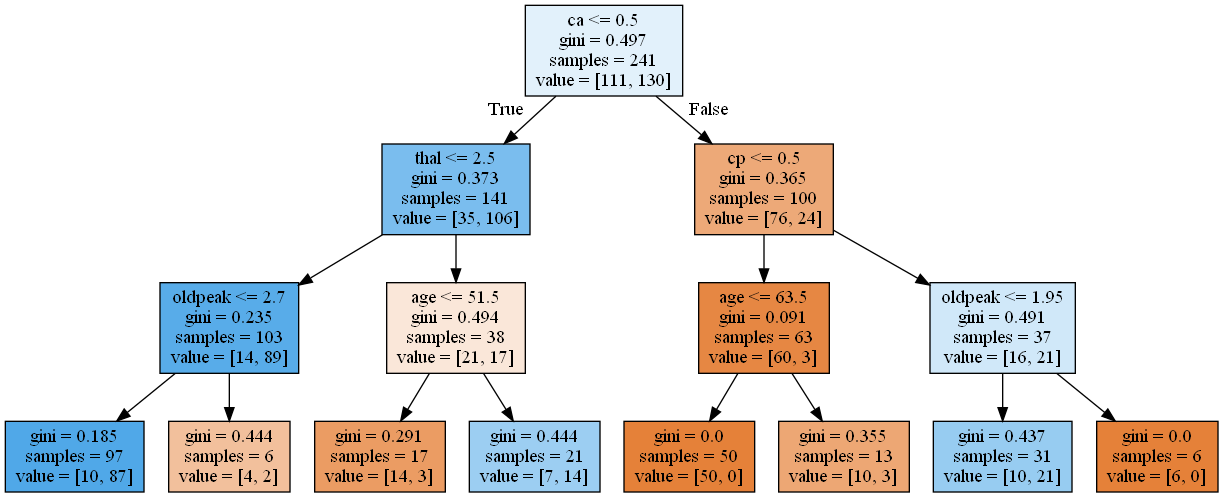

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth, Min Samples in leaf , Max Depth of the Tree.

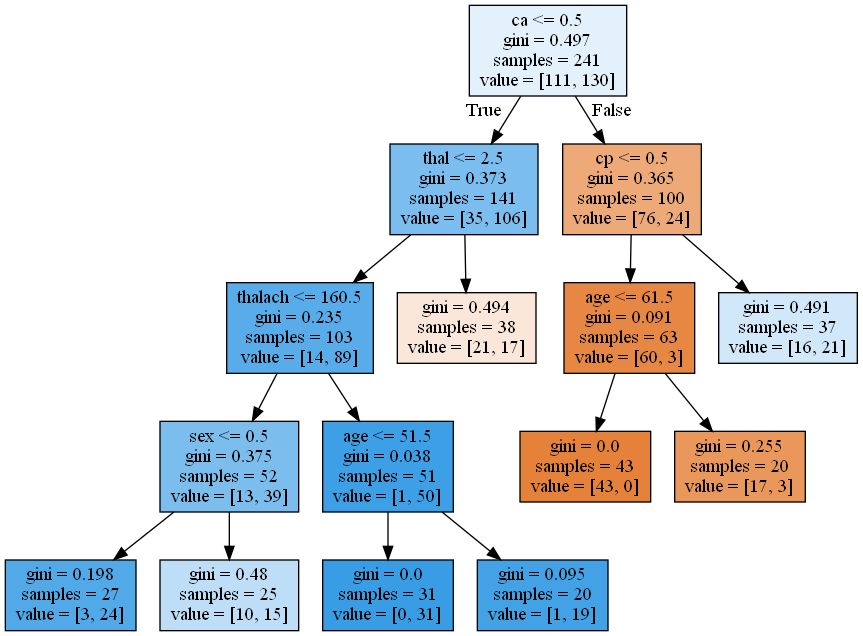

In [44]:
clf_tree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clf_tree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_tree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

## Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier
clftree = tree.DecisionTreeClassifier()

In [46]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True,  n_jobs=-1,
                            random_state=42)

In [47]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [48]:
y_test_pred = bag_clf.predict(X_test)

In [49]:
confusion_matrix(y_test,y_test_pred)

array([[23,  4],
       [ 6, 28]], dtype=int64)

In [50]:
accuracy_score(y_test,y_test_pred)

0.8360655737704918

## Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [53]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [54]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[24,  3],
       [ 5, 29]], dtype=int64)

In [55]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.8688524590163934

##  Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
rf_clf2 = RandomForestClassifier(n_estimators=250 ,n_jobs = -1,random_state = 42)

In [58]:
params_grid = {"max_features" : [1,2,3,4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],  
              }

In [59]:
grid_search = GridSearchCV(rf_clf2, params_grid,
                           n_jobs=-1, cv=5,verbose=1, scoring='accuracy')

In [60]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   36.9s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [61]:
grid_search.best_params_

{'max_features': 3, 'min_samples_split': 10}

In [62]:
gr_rf = grid_search.best_estimator_

In [63]:
y_pred_gr_rf = gr_rf.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred_gr_rf)

0.8852459016393442

In [65]:
confusion_matrix(y_test,y_pred_gr_rf)

array([[24,  3],
       [ 4, 30]], dtype=int64)

## GradientBoosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc_clf = GradientBoostingClassifier()

In [68]:
gbc_clf.fit(X_train, y_train)


GradientBoostingClassifier()

In [69]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.819672131147541

In [70]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)

In [71]:
gbc_clf2.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [72]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.8838174273858921

In [73]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8524590163934426

## Ada Boost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [76]:
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [77]:
accuracy_score(y_train, ada_clf.predict(X_train))


0.9377593360995851

In [78]:
accuracy_score(y_test, ada_clf.predict(X_test))


0.8852459016393442

In [79]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)


In [80]:
ada_clf2.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [81]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.8852459016393442

## XG Boost

In [82]:
!pip install xgboost

In [83]:
import xgboost as xgb

#### Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [85]:
xgb_clf = xgb.XGBClassifier(max_depth =3 ,n_estimator = 10000, learning_rate = 0.3,
                           n_jobs = -1)

In [86]:
xgb_clf.fit(X_train,y_train)

[10:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cool\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=10000, n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred_xgb_clf = xgb_clf.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred_xgb_clf)

0.7868852459016393

In [89]:
confusion_matrix(y_test,y_pred_xgb_clf)

array([[21,  6],
       [ 7, 27]], dtype=int64)

In [90]:
xgb.plot_importance(xgb_clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

In [91]:
xgb_clf1 = xgb.XGBClassifier(n_estimator = 250,
                            learning_rate = 0.1,
                            random_state = 42)

In [92]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [93]:
grid_search = GridSearchCV(xgb_clf1,param_test1,
                          n_jobs = -1,cv =3 ,scoring = 'accuracy')

In [94]:
grid_search.fit(X_train,y_train)

[10:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cool\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     n_jobs=None, num_parallel_tree=None,
                                     predictor=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                

In [95]:
cvxg_clf = grid_search.best_estimator_

In [96]:
accuracy_score(y_test,cvxg_clf.predict(X_test))

0.8360655737704918

In [97]:
confusion_matrix(y_test,cvxg_clf.predict(X_test))

array([[22,  5],
       [ 5, 29]], dtype=int64)

In [98]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

Final Result


Model Name	Accuracy
	
Decision Tree	
            Max_depth = 3	              0.7704
            Max_depth =4	              0.8196
Ensemble Method	
            Bagging 	                  0.8360
           Random Forest	              0.8688
           HyperTuning(Grid_search_rf)	  0.8852
           Gradient Boosting	          0.8524
          Ada Boosting	                  0.8853
         XG- Boosting	                  0.7868
         HyperTuning(Grid_search_Xgb)	  0.836


## we got best accuracy from Ada-Boosting and  random forest using HyperTuning method of grid search is 88%